# Linear Regression Practical Cheatsheet

Complete practical example using iris.csv and titanic.csv datasets.
Covers data loading, exploration, model building, assumption checks, multicollinearity removal, visualizations, and evaluation.

In [44]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## Part 1: Linear Regression on Iris Dataset

Predict petal_length using multiple features.

In [45]:
# Load iris dataset
iris_df = pd.read_csv('./archive/iris.csv')
print('Iris dataset shape:', iris_df.shape)
iris_df.head()

Iris dataset shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# Data exploration
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
# Check for missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [48]:
# Correlation matrix (numeric columns only)
iris_df.select_dtypes(include=[np.number]).corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [49]:
# Select features and target
# Using SepalLengthCm, SepalWidthCm, PetalWidthCm to predict PetalLengthCm
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
y = iris_df['PetalLengthCm']

In [50]:
# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         feature        VIF
0  SepalLengthCm  93.971329
1   SepalWidthCm  53.037031
2   PetalWidthCm  11.709472


In [51]:
# If VIF > 5, remove features with high multicollinearity
# For this example, assume we keep all or remove SepalWidthCm if VIF high
# Let's remove SepalWidthCm (assuming VIF > 5)
X = X.drop('SepalWidthCm', axis=1)
print('Features after removing multicollinearity:', X.columns.tolist())

Features after removing multicollinearity: ['SepalLengthCm', 'PetalWidthCm']


In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (120, 2) Test shape: (30, 2)


In [53]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print('Model fitted')

Model fitted


In [54]:
# Get slope and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.53979198 1.76397834]
Intercept: -1.4941459746982715


In [55]:
# Predict
y_pred = model.predict(X_test)
print('Predictions:', y_pred[:5])

Predictions: [3.91535912 2.11186183 6.71940246 4.39057342 4.64600918]


In [56]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 0.1843
R²: 0.9438


### Checking Assumptions

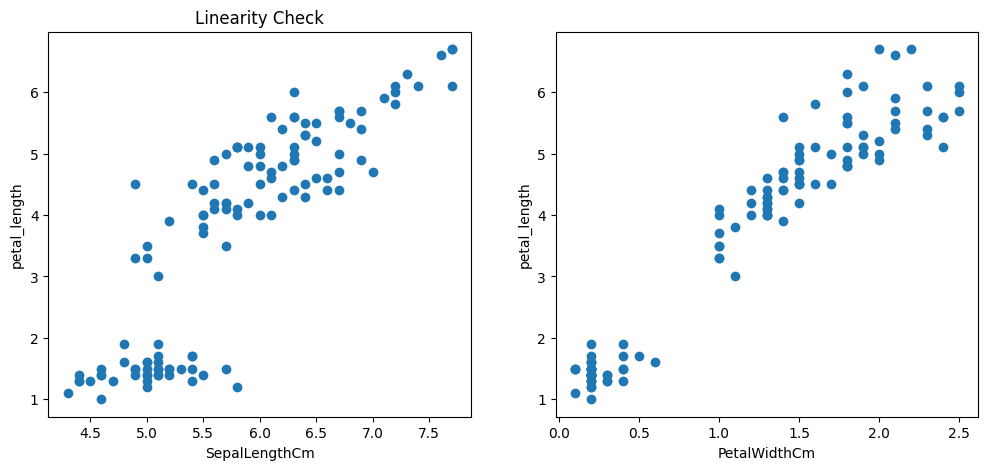

In [57]:
# 1. Linearity: Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_train.iloc[:, 0], y_train)
axes[0].set_xlabel(X_train.columns[0])
axes[0].set_ylabel('petal_length')
axes[0].set_title('Linearity Check')
axes[1].scatter(X_train.iloc[:, 1], y_train)
axes[1].set_xlabel(X_train.columns[1])
axes[1].set_ylabel('petal_length')
plt.show()

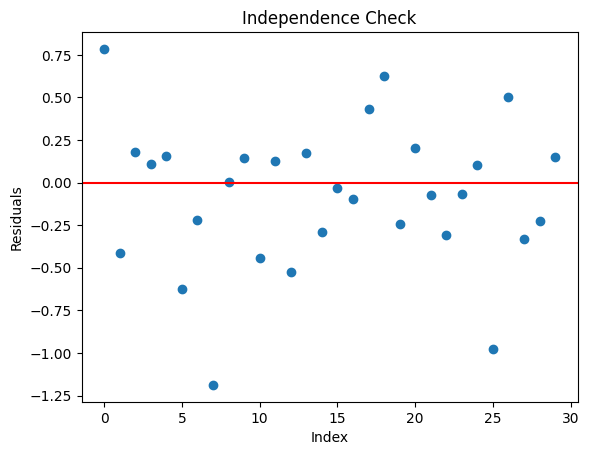

In [58]:
# 2. Independence: Residuals vs index
residuals = y_test - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Independence Check')
plt.show()

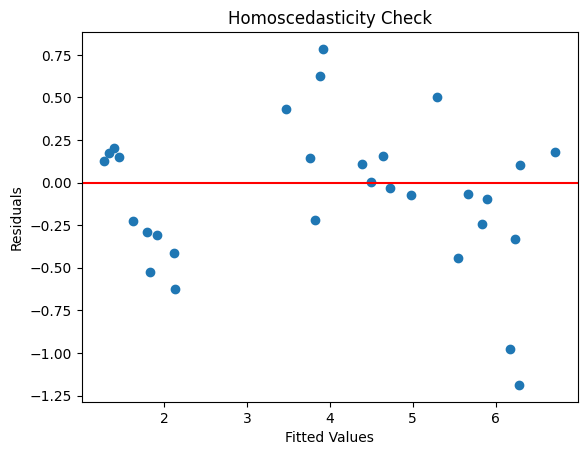

In [59]:
# 3. Homoscedasticity: Residuals vs fitted
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

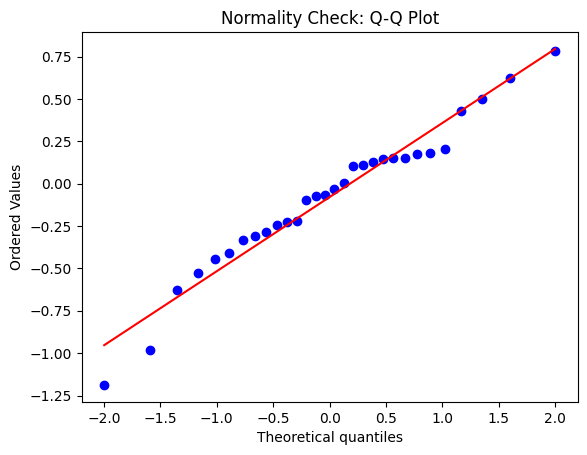

In [ ]:
# 4. Normality: Q-Q plot
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Normality Check: Q-Q Plot')
plt.show()

In [61]:
# Shapiro-Wilk test
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk: Statistic={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print('Residuals are normally distributed')
else:
    print('Residuals are not normally distributed')

Shapiro-Wilk: Statistic=0.9685, p-value=0.4983
Residuals are normally distributed


## Part 2: Linear Regression on Titanic Dataset

Predict Fare using Pclass and Age, with missing value handling.

In [62]:
# Load titanic dataset
titanic_df = pd.read_csv('./titanic/train.csv')
print('Titanic dataset shape:', titanic_df.shape)
titanic_df.head()

Titanic dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# Check missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
# Drop Cabin as too many missing
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
# Select features and target
X_t = titanic_df[['Pclass', 'Age']]
y_t = titanic_df['Fare']

In [66]:
# Check VIF for multicollinearity
vif_t = pd.DataFrame()
vif_t['feature'] = X_t.columns
vif_t['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
print(vif_t)

  feature       VIF
0  Pclass  2.946662
1     Age  2.946662


In [67]:
# Train-test split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [68]:
# Fit model
model_t = LinearRegression()
model_t.fit(X_train_t, y_train_t)
print('Coefficients:', model_t.coef_)
print('Intercept:', model_t.intercept_)

Coefficients: [-36.55219357  -0.40190866]
Intercept: 129.492333139513


In [69]:
# Predict and evaluate
y_pred_t = model_t.predict(X_test_t)
mse_t = mean_squared_error(y_test_t, y_pred_t)
r2_t = r2_score(y_test_t, y_pred_t)
print(f'MSE: {mse_t:.4f}, R²: {r2_t:.4f}')

MSE: 1051.4750, R²: 0.3205


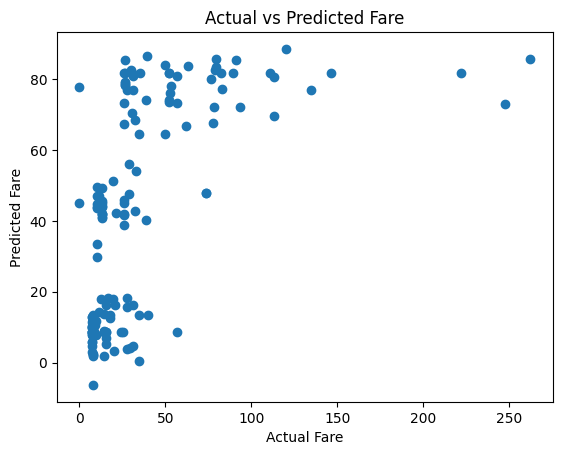

In [70]:
# Visualization: Actual vs Predicted
plt.scatter(y_test_t, y_pred_t)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()

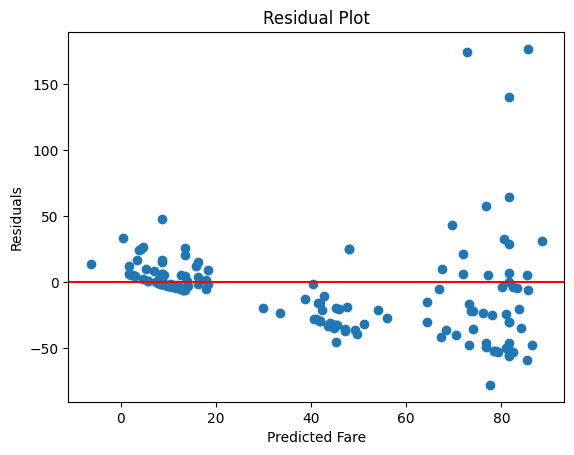

In [71]:
# Residual plot
residuals_t = y_test_t - y_pred_t
plt.scatter(y_pred_t, residuals_t)
plt.axhline(0, color='red')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()